# Punto 7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import re
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from punto5 import Tokenizer

In [3]:
def terms(data: list) -> dict:
    data.sort()
    unique = []
    count = 0
    last_word = ""
    for word in data:
        if word != last_word:
            if last_word != "":
                unique.append({"term": last_word, "tf": count})
            count = 1
            last_word = word
        else:
            count += 1

    if last_word != "":
        unique.append({"term": last_word, "tf": count})
        return unique


def term_in_data(data: list, term: str) -> bool:
    for element in data:
        if element["term"] == term:
            return True
    return False

def set_term(data: list, term: str, tf: int) -> list:
    for element in data:
        if element["term"] == term:
            element["df"] += 1
            element["tf"] += tf
            return data

def read_file(url):
    data = []
    tokenizer = Tokenizer(words=True, names=True, abbreviations=True, numbers=True)
    with open(url, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            tokens = tokenizer.tokenize(line)
            terms_data = terms(tokens)
            for term in terms_data:
                if not term_in_data(data,term["term"]):
                    data.append({
                        "term": term["term"],
                        "df": 1,
                        "tf": term["tf"]
                    })
                else:
                    set_term(data, term["term"], term["tf"])
    return data

In [4]:
url = "pg2000.txt"
data = read_file(url)

In [5]:
data.sort(key=lambda x: x["tf"], reverse=True)
ranks = np.arange(1, len(data) + 1)
freqs = np.array([entry["tf"] for entry in data])

# Ajuste con Zipf usando regresión lineal en escala logarítmica
log_ranks = np.log(ranks)
log_freqs = np.log(freqs)
coeffs = np.polyfit(log_ranks, log_freqs, 1)  # Ajuste lineal en log-log
predicted_log_freqs = np.polyval(coeffs, log_ranks)

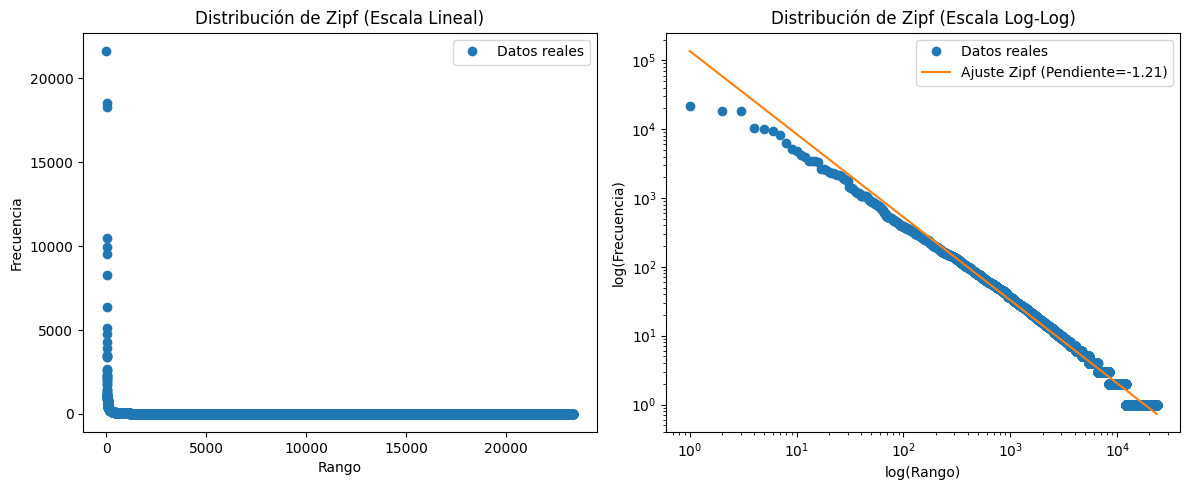

Coeficiente alfa de la Ley de Zipf: -1.21
Coeficiente C de la Ley de Zipf: 136541.88


In [6]:
# Gráfico en escala lineal
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ranks, freqs, marker="o", linestyle="none", label="Datos reales")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.title("Distribución de Zipf (Escala Lineal)")
plt.legend()

# Gráfico en escala log-log
plt.subplot(1, 2, 2)
plt.loglog(ranks, freqs, "o", label="Datos reales")
plt.loglog(ranks, np.exp(predicted_log_freqs), label=f"Ajuste Zipf (Pendiente={coeffs[0]:.2f})")
plt.xlabel("log(Rango)")
plt.ylabel("log(Frecuencia)")
plt.title("Distribución de Zipf (Escala Log-Log)")
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar coeficiente de ajuste
print(f"Coeficiente alfa de la Ley de Zipf: {coeffs[0]:.2f}")
print(f"Coeficiente C de la Ley de Zipf: {np.exp(coeffs[1]):.2f}")